# 2022 FIFA World Cup Predictions

Kaggle link: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?resource=download

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#previewing the data
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [3]:
#home team data
results_home = pd.read_csv('results.csv')
results_home['date'] = pd.to_datetime(results_home['date'])
results_home = results_home.rename(columns = {'home_team':'team', 
                                              'away_team':'opponent',
                                              'home_score':'team_score',
                                              'away_score':'opponent_score'})
results_home['h_or_a'] = 'Home'

#away team data
results_away = pd.read_csv('results.csv')
results_away['date'] = pd.to_datetime(results_away['date'])
results_away = results_away.rename(columns = {'home_team':'opponent', 
                                              'away_team':'team',
                                              'home_score':'opponent_score',
                                              'away_score':'team_score'})
results_away = results_away[['date', 'team', 'opponent', 'team_score', 'opponent_score', 
                             'tournament', 'city', 'country', 'neutral']]
results_away['h_or_a'] = 'Away'

#concatenating home and away team data
results = pd.concat([results_home, results_away], axis = 0)
results

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Home
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Home
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home
...,...,...,...,...,...,...,...,...,...,...
44147,2022-12-01,Morocco,Canada,NaN,NaN,FIFA World Cup,Doha,Qatar,True,Away
44148,2022-12-02,Switzerland,Serbia,NaN,NaN,FIFA World Cup,Doha,Qatar,True,Away
44149,2022-12-02,Brazil,Cameroon,NaN,NaN,FIFA World Cup,Lusail,Qatar,True,Away
44150,2022-12-02,Uruguay,Ghana,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True,Away


In [4]:
#shape of newly formatted data
results.shape

(88304, 10)

In [5]:
#shape of original data
df.shape

(44152, 9)

In [6]:
#number of matches
results['p'] = 1

#wins
def set_result(row):
    if row["team_score"] > row["opponent_score"]:
        return 1
    else:
        return 0
results = results.assign(w = results.apply(set_result, axis=1))

#draws
def set_result(row):
    if row["team_score"] == row["opponent_score"]:
        return 1
    else:
        return 0
results = results.assign(d = results.apply(set_result, axis=1))

#losses
def set_result(row):
    if row["team_score"] < row["opponent_score"]:
        return 1
    else:
        return 0
results = results.assign(l = results.apply(set_result, axis=1))

results

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Home,1,0,1,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,1,1,0,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,1,1,0,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Home,1,0,1,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44147,2022-12-01,Morocco,Canada,NaN,NaN,FIFA World Cup,Doha,Qatar,True,Away,1,0,0,0
44148,2022-12-02,Switzerland,Serbia,NaN,NaN,FIFA World Cup,Doha,Qatar,True,Away,1,0,0,0
44149,2022-12-02,Brazil,Cameroon,NaN,NaN,FIFA World Cup,Lusail,Qatar,True,Away,1,0,0,0
44150,2022-12-02,Uruguay,Ghana,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True,Away,1,0,0,0


In [7]:
#2022 World Cup teams
wc_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 
            'England', 'Iran', 'United States', 'Wales',
            'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
            'France', 'Australia', 'Denmark', 'Tunisia',
            'Spain', 'Costa Rica', 'Germany', 'Japan',
            'Belgium', 'Canada', 'Morocco', 'Croatia',
            'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
            'Portugal', 'Ghana', 'Uruguay', 'South Korea']
results_2022_teams = results[(results['team'].isin(wc_teams)) & 
                             (results['opponent'].isin(wc_teams))]
results_2022_teams

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,Home,1,1,0,0
14,1880-03-15,Wales,England,2.0,3.0,Friendly,Wrexham,Wales,False,Home,1,0,0,1
16,1881-02-26,England,Wales,0.0,1.0,Friendly,Blackburn,England,False,Home,1,0,0,1
22,1882-03-13,Wales,England,5.0,3.0,Friendly,Wrexham,Wales,False,Home,1,1,0,0
24,1883-02-03,England,Wales,5.0,0.0,Friendly,London,England,False,Home,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44147,2022-12-01,Morocco,Canada,NaN,NaN,FIFA World Cup,Doha,Qatar,True,Away,1,0,0,0
44148,2022-12-02,Switzerland,Serbia,NaN,NaN,FIFA World Cup,Doha,Qatar,True,Away,1,0,0,0
44149,2022-12-02,Brazil,Cameroon,NaN,NaN,FIFA World Cup,Lusail,Qatar,True,Away,1,0,0,0
44150,2022-12-02,Uruguay,Ghana,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True,Away,1,0,0,0


In [8]:
#matches since last World Cup
results_cur_all = results_2022_teams[(results_2022_teams['date'] >= '2018-07-16') & 
                                     (results_2022_teams['date'] <= '2022-11-19')]
results_cur_all

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
40323,2018-09-06,Germany,France,0.0,0.0,UEFA Nations League,Munich,Germany,False,Home,1,0,1,0
40337,2018-09-06,Portugal,Croatia,1.0,1.0,Friendly,Faro-Loulé,Portugal,False,Home,1,0,1,0
40356,2018-09-07,South Korea,Costa Rica,2.0,0.0,Friendly,Goyang,South Korea,False,Home,1,1,0,0
40357,2018-09-07,Mexico,Uruguay,1.0,4.0,Friendly,Houston,United States,True,Home,1,0,0,1
40361,2018-09-07,United States,Brazil,0.0,2.0,Friendly,East Rutherford,United States,False,Home,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44036,2022-09-27,Cameroon,South Korea,0.0,1.0,Friendly,Seoul,South Korea,False,Away,1,0,0,1
44046,2022-09-27,United States,Saudi Arabia,0.0,0.0,Friendly,Murcia,Spain,True,Away,1,0,1,0
44050,2022-09-27,Spain,Portugal,1.0,0.0,UEFA Nations League,Braga,Portugal,False,Away,1,1,0,0
44088,2022-11-16,Tunisia,Iran,2.0,0.0,Friendly,Doha,Qatar,True,Away,1,1,0,0


In [9]:
results_cur_all.to_csv('results_2022_teams_cur_all.csv')

In [10]:
#matches since last World Cup excluding friendlies
results_cur_cmp = results_2022_teams[(results_2022_teams['date'] >= '2018-07-16') &
                                     (results_2022_teams['date'] <= '2022-11-19') &
                                     (results_2022_teams['tournament'] != 'Friendly')]
results_cur_cmp.head()

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
40323,2018-09-06,Germany,France,0.0,0.0,UEFA Nations League,Munich,Germany,False,Home,1,0,1,0
40368,2018-09-08,England,Spain,1.0,2.0,UEFA Nations League,London,England,False,Home,1,0,0,1
40389,2018-09-09,France,Netherlands,2.0,1.0,UEFA Nations League,Paris,France,False,Home,1,1,0,0
40391,2018-09-09,Denmark,Wales,2.0,0.0,UEFA Nations League,Aarhus,Denmark,False,Home,1,1,0,0
40424,2018-09-11,Spain,Croatia,6.0,0.0,UEFA Nations League,Elche,Spain,False,Home,1,1,0,0


In [11]:
#Create data for teams in Group Stage
data = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                 'England', 'Iran', 'United States', 'Wales',
                 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                 'France', 'Australia', 'Denmark', 'Tunisia',
                 'Spain', 'Costa Rica', 'Germany', 'Japan',
                 'Belgium', 'Canada', 'Morocco', 'Croatia',
                 'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                 'Portugal', 'Ghana', 'Uruguay', 'South Korea'],
       'group': ['A','A','A','A',
                 'B','B','B','B',
                 'C','C','C','C',
                 'D','D','D','D',
                 'E','E','E','E',
                 'F','F','F','F',
                 'G','G','G','G',
                 'H','H','H','H']}
groups_team = pd.DataFrame(data)

In [12]:
#Create data for opponents in Group Stage
data = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                 'England', 'Iran', 'United States', 'Wales',
                 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                 'France', 'Australia', 'Denmark', 'Tunisia',
                 'Spain', 'Costa Rica', 'Germany', 'Japan',
                 'Belgium', 'Canada', 'Morocco', 'Croatia',
                 'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                 'Portugal', 'Ghana', 'Uruguay', 'South Korea'],
       'group': ['A','A','A','A',
                 'B','B','B','B',
                 'C','C','C','C',
                 'D','D','D','D',
                 'E','E','E','E',
                 'F','F','F','F',
                 'G','G','G','G',
                 'H','H','H','H']}
groups_opponent = pd.DataFrame(data)

In [13]:
#Create Group Stage groups
group_a = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
group_b = ['England', 'Iran', 'United States', 'Wales']
group_c = ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
group_d = ['France', 'Australia', 'Denmark', 'Tunisia']
group_e = ['Spain', 'Costa Rica', 'Germany', 'Japan']
group_f = ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_g = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_h = ['Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [14]:
#Get all matches between Group A teams since previous World Cup
results_a = results_cur_all[(results_cur_all['team'].isin(group_a)) & 
                            (results_cur_all['opponent'].isin(group_a))]
results_a

,date,team,opponent,team_score,opponent_score,tournament,city,country,neutral,h_or_a,p,w,d,l
40490,2018-10-12,Qatar,Ecuador,4.0,3.0,Friendly,Doha,Qatar,False,Home,1,1,0,0
40490,2018-10-12,Ecuador,Qatar,3.0,4.0,Friendly,Doha,Qatar,False,Away,1,0,0,1


## Poisson Distribution amongst all World Cup teams

In [15]:
#results_a = results_cur_all[(results_cur_all['team'].isin(group_a))]
#results_b = results_cur_all[(results_cur_all['team'].isin(group_b))]
#results_c = results_cur_all[(results_cur_all['team'].isin(group_c))]
#results_d = results_cur_all[(results_cur_all['team'].isin(group_d))]
#results_e = results_cur_all[(results_cur_all['team'].isin(group_e))]
#results_f = results_cur_all[(results_cur_all['team'].isin(group_f))]
#results_g = results_cur_all[(results_cur_all['team'].isin(group_g))]
#results_h = results_cur_all[(results_cur_all['team'].isin(group_h))]

In [16]:
#create standings table for each team
table_group = results_cur_all[['team','p','w','d','l','team_score','opponent_score']]
table_group = table_group.rename(columns = {'team_score':'gf',
                                            'opponent_score':'ga'})
table_group = table_group.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_group['gpg_scored'] = table_group['gf'] / table_group['p']
table_group['gpg_conceded'] = table_group['ga'] / table_group['p']

table_group

,p,w,d,l,gf,ga,gpg_scored,gpg_conceded
team,,,,,,,,
Argentina,19,13,4,2,33.0,9.0,1.736842,0.473684
Australia,6,0,2,4,2.0,7.0,0.333333,1.166667
Belgium,20,12,3,5,37.0,26.0,1.850000,1.300000
Brazil,21,15,4,2,39.0,8.0,1.857143,0.380952
Cameroon,6,0,3,3,0.0,4.0,0.000000,0.666667
Canada,14,6,2,6,16.0,16.0,1.142857,1.142857
Costa Rica,19,2,5,12,11.0,28.0,0.578947,1.473684
Croatia,21,7,4,10,26.0,38.0,1.238095,1.809524
Denmark,18,8,3,7,28.0,23.0,1.555556,1.277778


In [17]:
table_group.to_csv('table_group.csv')

In [18]:
#goals scored per game for all teams
avg_goals = table_group['gf'].sum() / table_group['p'].sum()
avg_goals

1.2669172932330828

In [19]:
#goals scored per game for all teams (should be the same as goals scored per game for all teams)
table_group['ga'].sum() / table_group['p'].sum()

1.2669172932330828

In [20]:
#calculate strengths
strengths = results_cur_all.groupby(['team']).mean().sort_values('team', ascending = True)
strengths = strengths.reset_index()
strengths = strengths[['team', 'team_score', 'opponent_score']]
strengths['att'] = strengths['team_score'] / avg_goals
strengths['def'] = strengths['opponent_score'] / avg_goals
strengths = strengths[['team', 'att', 'def']]
strengths_team = strengths.rename(columns = {'att':'team_att',
                                             'def':'team_def'})
strengths_opponent = strengths.rename(columns = {'team':'opponent',
                                                 'att':'opponent_att',
                                                 'def':'opponent_def'})
strengths

,team,att,def
0,Argentina,1.370920,0.373887
1,Australia,0.263106,0.920870
2,Belgium,1.460237,1.026113
3,Brazil,1.465875,0.300692
4,Cameroon,0.000000,0.526212
5,Canada,0.902077,0.902077
6,Costa Rica,0.456973,1.163205
7,Croatia,0.977250,1.428289
8,Denmark,1.227827,1.008572
9,Ecuador,0.745467,1.447082


In [21]:
strengths_groups = pd.merge(groups_team, strengths, on = 'team')
strengths_groups

,team,group,att,def
0,Qatar,A,0.701616,1.578635
1,Ecuador,A,0.745467,1.447082
2,Senegal,A,0.789318,0.986647
3,Netherlands,A,1.541048,0.902077
4,England,B,1.127596,0.751731
5,Iran,B,0.591988,1.085312
6,United States,B,0.817507,0.704748
7,Wales,B,0.581602,1.537092
8,Argentina,C,1.370920,0.373887
9,Saudi Arabia,C,0.182150,0.546451


World Cup schedule: https://fbref.com/en/comps/1/schedule/World-Cup-Scores-and-Fixtures

In [22]:
#group stage predictions (using both round() and np.floor)
group_stage_h = pd.read_csv('2022_wc_schedule.csv', usecols = [0,1,2,3,4,8])
group_stage_h['Date'] = pd.to_datetime(group_stage_h['Date'])
group_stage_h = group_stage_h.dropna()
group_stage_h['Home'] = group_stage_h['Home'].replace(['Qatar qa', 'Ecuador ec', 'Senegal sn', 'Netherlands nl',
                                                       'England eng', 'IR Iran ir', 'United States us','Wales wls',
                                                       'Argentina ar', 'Saudi Arabia sa', 'Mexico mx', 'Poland pl',
                                                       'France fr', 'Australia au', 'Denmark dk', 'Tunisia tn',
                                                       'Spain es', 'Costa Rica cr', 'Germany de', 'Japan jp',
                                                       'Belgium be', 'Canada ca', 'Morocco ma', 'Croatia hr',
                                                       'Brazil br', 'Serbia rs', 'Switzerland ch', 'Cameroon cm',
                                                       'Portugal pt', 'Ghana gh', 'Uruguay uy', 'Korea Republic kr'],
                                                      ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                                                       'England', 'Iran', 'United States','Wales',
                                                       'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                                                       'France', 'Australia', 'Denmark', 'Tunisia',
                                                       'Spain', 'Costa Rica', 'Germany', 'Japan',
                                                       'Belgium', 'Canada', 'Morocco', 'Croatia',
                                                       'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                                                       'Portugal', 'Ghana', 'Uruguay', 'South Korea'])
group_stage_h['Away'] = group_stage_h['Away'].replace(['qa Qatar', 'ec Ecuador', 'sn Senegal', 'nl Netherlands',
                                                       'eng England', 'ir IR Iran', 'us United States','wls Wales',
                                                       'ar Argentina', 'sa Saudi Arabia', 'mx Mexico', 'pl Poland',
                                                       'fr France', 'au Australia', 'dk Denmark', 'tn Tunisia',
                                                       'es Spain', 'cr Costa Rica', 'de Germany', 'jp Japan',
                                                       'be Belgium', 'ca Canada', 'ma Morocco', 'hr Croatia',
                                                       'br Brazil', 'rs Serbia', 'ch Switzerland', 'cm Cameroon',
                                                       'pt Portugal', 'gh Ghana', 'uy Uruguay', 'kr Korea Republic'],
                                                      ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                                                       'England', 'Iran', 'United States','Wales',
                                                       'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                                                       'France', 'Australia', 'Denmark', 'Tunisia',
                                                       'Spain', 'Costa Rica', 'Germany', 'Japan',
                                                       'Belgium', 'Canada', 'Morocco', 'Croatia',
                                                       'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                                                       'Portugal', 'Ghana', 'Uruguay', 'South Korea'])
group_stage_h = group_stage_h.rename(columns = {'Home':'team', 'Away':'opponent'})
group_stage_h['h_or_a'] = 'Home'

group_stage_h = pd.merge(group_stage_h, groups_team, on = 'team')
group_stage_h = pd.merge(group_stage_h, strengths_team, on = 'team')
group_stage_h = pd.merge(group_stage_h, strengths_opponent, on = 'opponent')


group_stage_a = pd.read_csv('2022_wc_schedule.csv', usecols = [0,1,2,3,4,8])
group_stage_a['Date'] = pd.to_datetime(group_stage_a['Date'])
group_stage_a = group_stage_a.dropna()
group_stage_a['Home'] = group_stage_a['Home'].replace(['Qatar qa', 'Ecuador ec', 'Senegal sn', 'Netherlands nl',
                                                       'England eng', 'IR Iran ir', 'United States us','Wales wls',
                                                       'Argentina ar', 'Saudi Arabia sa', 'Mexico mx', 'Poland pl',
                                                       'France fr', 'Australia au', 'Denmark dk', 'Tunisia tn',
                                                       'Spain es', 'Costa Rica cr', 'Germany de', 'Japan jp',
                                                       'Belgium be', 'Canada ca', 'Morocco ma', 'Croatia hr',
                                                       'Brazil br', 'Serbia rs', 'Switzerland ch', 'Cameroon cm',
                                                       'Portugal pt', 'Ghana gh', 'Uruguay uy', 'Korea Republic kr'],
                                                      ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                                                       'England', 'Iran', 'United States','Wales',
                                                       'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                                                       'France', 'Australia', 'Denmark', 'Tunisia',
                                                       'Spain', 'Costa Rica', 'Germany', 'Japan',
                                                       'Belgium', 'Canada', 'Morocco', 'Croatia',
                                                       'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                                                       'Portugal', 'Ghana', 'Uruguay', 'South Korea'])
group_stage_a['Away'] = group_stage_a['Away'].replace(['qa Qatar', 'ec Ecuador', 'sn Senegal', 'nl Netherlands',
                                                       'eng England', 'ir IR Iran', 'us United States','wls Wales',
                                                       'ar Argentina', 'sa Saudi Arabia', 'mx Mexico', 'pl Poland',
                                                       'fr France', 'au Australia', 'dk Denmark', 'tn Tunisia',
                                                       'es Spain', 'cr Costa Rica', 'de Germany', 'jp Japan',
                                                       'be Belgium', 'ca Canada', 'ma Morocco', 'hr Croatia',
                                                       'br Brazil', 'rs Serbia', 'ch Switzerland', 'cm Cameroon',
                                                       'pt Portugal', 'gh Ghana', 'uy Uruguay', 'kr Korea Republic'],
                                                      ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                                                       'England', 'Iran', 'United States','Wales',
                                                       'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                                                       'France', 'Australia', 'Denmark', 'Tunisia',
                                                       'Spain', 'Costa Rica', 'Germany', 'Japan',
                                                       'Belgium', 'Canada', 'Morocco', 'Croatia',
                                                       'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                                                       'Portugal', 'Ghana', 'Uruguay', 'South Korea'])
group_stage_a = group_stage_a.rename(columns = {'Home':'opponent', 'Away':'team'})
group_stage_a = group_stage_a[['Wk', 'Day', 'Date', 'Time', 'team', 'opponent']]
group_stage_a['h_or_a'] = 'Away'

group_stage_a = pd.merge(group_stage_a, groups_team, on = 'team')
group_stage_a = pd.merge(group_stage_a, strengths_team, on = 'team')
group_stage_a = pd.merge(group_stage_a, strengths_opponent, on = 'opponent')

group_stage = pd.concat([group_stage_h, group_stage_a], axis = 0)

group_stage['team_xG'] = group_stage['team_att'] * group_stage['opponent_def'] * avg_goals
group_stage['opponent_xG'] = group_stage['opponent_att'] * group_stage['team_def'] * avg_goals

group_stage_xG = group_stage[(group_stage['h_or_a'] == 'Home')]

group_stage['team_pred_1'] = group_stage['team_xG'].round()
group_stage['opponent_pred_1'] = group_stage['opponent_xG'].round()
group_stage['team_pred_2'] = group_stage['team_xG'].apply(np.floor)
group_stage['opponent_pred_2'] = group_stage['opponent_xG'].apply(np.floor)

group_stage = group_stage.drop(['team_att', 'team_def', 'opponent_att', 'opponent_def'], axis = 1)

group_stage = group_stage.sort_values(by = ['Date','Time','h_or_a'], ascending = [True, True, False])
group_stage

,Wk,Day,Date,Time,team,opponent,h_or_a,group,team_xG,opponent_xG,team_pred_1,opponent_pred_1,team_pred_2,opponent_pred_2
0,1.0,Sun,2022-11-20,19:00 (11:00),Qatar,Ecuador,Home,A,1.286295,1.490933,1.0,1.0,1.0,1.0
0,1.0,Sun,2022-11-20,19:00 (11:00),Ecuador,Qatar,Away,A,1.490933,1.286295,1.0,1.0,1.0,1.0
4,1.0,Mon,2022-11-21,16:00 (08:00),England,Iran,Home,B,1.550445,0.563798,2.0,1.0,1.0,0.0
4,1.0,Mon,2022-11-21,16:00 (08:00),Iran,England,Away,B,0.563798,1.550445,1.0,2.0,0.0,1.0
8,1.0,Mon,2022-11-21,19:00 (11:00),Senegal,Netherlands,Home,A,0.902077,1.926311,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,3.0,Fri,2022-12-02,18:00 (10:00),Uruguay,Ghana,Away,H,1.653808,1.165183,2.0,1.0,1.0,1.0
39,3.0,Fri,2022-12-02,22:00 (14:00),Serbia,Switzerland,Home,G,2.257372,1.387979,2.0,1.0,2.0,1.0
46,3.0,Fri,2022-12-02,22:00 (14:00),Cameroon,Brazil,Home,G,0.000000,0.977250,0.0,1.0,0.0,0.0
39,3.0,Fri,2022-12-02,22:00 (14:00),Brazil,Cameroon,Away,G,0.977250,0.000000,1.0,0.0,0.0,0.0


In [23]:
#export one set of results to csv
group_stage_xG.to_csv('group_stage_xG.csv')

In [24]:
#team predictions using round()
group_stage['team_pred_1'].mean()

1.15625

In [25]:
#opponent predictions using round()
group_stage['opponent_pred_1'].mean()

1.15625

In [26]:
#team predictions using np.floor
group_stage['team_pred_2'].mean()

0.71875

In [27]:
#opponent predictions using np.floor
group_stage['opponent_pred_2'].mean()

0.71875

In [28]:
#show average goals scored by World Cup since 1974
wc_goals = pd.read_csv('results.csv')
wc_goals['date'] = pd.to_datetime(wc_goals['date'])
wc_goals = wc_goals[(wc_goals['date'] <= '2018-07-16') & 
                    (wc_goals['date'] >= '1972-01-01') & 
                    (wc_goals['tournament'] == 'FIFA World Cup')]
wc_goals['date'] = pd.DatetimeIndex(wc_goals['date']).year
wc_goals = wc_goals.drop('neutral', axis = 1)
wc_goals['both_scores'] = (wc_goals['home_score'] + wc_goals['away_score']) / 2
wc_goals = wc_goals.groupby(by = 'date').mean().sort_values('date')
wc_goals = wc_goals.reset_index()
wc_goals

,date,home_score,away_score,both_scores
0,1974,1.500000,1.052632,1.276316
1,1978,1.473684,1.210526,1.342105
2,1982,1.826923,0.980769,1.403846
3,1986,1.461538,1.076923,1.269231
4,1990,1.269231,0.942308,1.105769
5,1994,1.576923,1.134615,1.355769
6,1998,1.578125,1.093750,1.335938
7,2002,1.421875,1.093750,1.257812
8,2006,1.390625,0.906250,1.148438
9,2010,1.203125,1.062500,1.132812


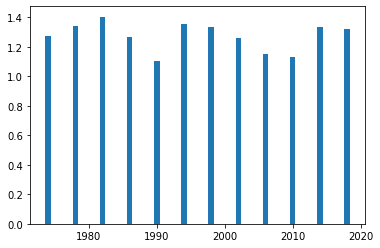

In [29]:
#create bar graph of average goals scored by World Cup since 1974
plt.bar(wc_goals['date'], wc_goals['both_scores'])
plt.show()

In [30]:
#group stage predictions
group_stage = group_stage.drop(['team_xG', 'opponent_xG', 'team_pred_2', 'opponent_pred_2'], axis = 1)
group_stage = group_stage.rename(columns = {'team_pred_1':'GF', 'opponent_pred_1':'GA'})
group_stage

,Wk,Day,Date,Time,team,opponent,h_or_a,group,GF,GA
0,1.0,Sun,2022-11-20,19:00 (11:00),Qatar,Ecuador,Home,A,1.0,1.0
0,1.0,Sun,2022-11-20,19:00 (11:00),Ecuador,Qatar,Away,A,1.0,1.0
4,1.0,Mon,2022-11-21,16:00 (08:00),England,Iran,Home,B,2.0,1.0
4,1.0,Mon,2022-11-21,16:00 (08:00),Iran,England,Away,B,1.0,2.0
8,1.0,Mon,2022-11-21,19:00 (11:00),Senegal,Netherlands,Home,A,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
47,3.0,Fri,2022-12-02,18:00 (10:00),Uruguay,Ghana,Away,H,2.0,1.0
39,3.0,Fri,2022-12-02,22:00 (14:00),Serbia,Switzerland,Home,G,2.0,1.0
46,3.0,Fri,2022-12-02,22:00 (14:00),Cameroon,Brazil,Home,G,0.0,1.0
39,3.0,Fri,2022-12-02,22:00 (14:00),Brazil,Cameroon,Away,G,1.0,0.0


In [31]:
#group stage standings stats
group_stage['P'] = 1

def result(row):
    if row['GF'] > row['GA']:
        return 1
    else:
        return 0

group_stage = group_stage.assign(W = group_stage.apply(result, axis = 1))

def result(row):
    if row['GF'] == row['GA']:
        return 1
    else:
        return 0

group_stage = group_stage.assign(D = group_stage.apply(result, axis = 1))

def result(row):
    if row['GF'] < row['GA']:
        return 1
    else:
        return 0

group_stage = group_stage.assign(L = group_stage.apply(result, axis = 1))

group_stage['GD'] = group_stage['GF'] - group_stage['GA']
group_stage['Pts'] = group_stage['W'] * 3 + group_stage['D']

group_stage

,Wk,Day,Date,Time,team,opponent,h_or_a,group,GF,GA,P,W,D,L,GD,Pts
0,1.0,Sun,2022-11-20,19:00 (11:00),Qatar,Ecuador,Home,A,1.0,1.0,1,0,1,0,0.0,1
0,1.0,Sun,2022-11-20,19:00 (11:00),Ecuador,Qatar,Away,A,1.0,1.0,1,0,1,0,0.0,1
4,1.0,Mon,2022-11-21,16:00 (08:00),England,Iran,Home,B,2.0,1.0,1,1,0,0,1.0,3
4,1.0,Mon,2022-11-21,16:00 (08:00),Iran,England,Away,B,1.0,2.0,1,0,0,1,-1.0,0
8,1.0,Mon,2022-11-21,19:00 (11:00),Senegal,Netherlands,Home,A,1.0,2.0,1,0,0,1,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,3.0,Fri,2022-12-02,18:00 (10:00),Uruguay,Ghana,Away,H,2.0,1.0,1,1,0,0,1.0,3
39,3.0,Fri,2022-12-02,22:00 (14:00),Serbia,Switzerland,Home,G,2.0,1.0,1,1,0,0,1.0,3
46,3.0,Fri,2022-12-02,22:00 (14:00),Cameroon,Brazil,Home,G,0.0,1.0,1,0,0,1,-1.0,0
39,3.0,Fri,2022-12-02,22:00 (14:00),Brazil,Cameroon,Away,G,1.0,0.0,1,1,0,0,1.0,3


In [32]:
#create dataframes fro each group
group_a_matches = group_stage[(group_stage['group'] == 'A')]
group_b_matches = group_stage[(group_stage['group'] == 'B')]
group_c_matches = group_stage[(group_stage['group'] == 'C')]
group_d_matches = group_stage[(group_stage['group'] == 'D')]
group_e_matches = group_stage[(group_stage['group'] == 'E')]
group_f_matches = group_stage[(group_stage['group'] == 'F')]
group_g_matches = group_stage[(group_stage['group'] == 'G')]
group_h_matches = group_stage[(group_stage['group'] == 'H')]

In [33]:
#group a standings
group_a = group_a_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_a = group_a[['P','W','D','L','GF','GA','GD','Pts']]
group_a['Pos'] = ['A1','A2','A3','A4']
group_a = group_a.reset_index()
group_a

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Netherlands,3,3,0,0,8.0,3.0,5.0,9,A1
1,Senegal,3,1,1,1,4.0,4.0,0.0,4,A2
2,Ecuador,3,0,2,1,3.0,5.0,-2.0,2,A3
3,Qatar,3,0,1,2,3.0,6.0,-3.0,1,A4


In [34]:
#group b standings
group_b = group_b_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_b = group_b[['P','W','D','L','GF','GA','GD','Pts']]
group_b['Pos'] = ['B1','B2','B3','B4']
group_b = group_b.reset_index()
group_b

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,England,3,2,1,0,5.0,3.0,2.0,7,B1
1,United States,3,1,2,0,4.0,3.0,1.0,5,B2
2,Iran,3,0,2,1,3.0,4.0,-1.0,2,B3
3,Wales,3,0,1,2,3.0,5.0,-2.0,1,B4


In [35]:
#group c standings
group_c = group_c_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_c = group_c[['P','W','D','L','GF','GA','GD','Pts']]
group_c['Pos'] = ['C1','C2','C3','C4']
group_c = group_c.reset_index()
group_c

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Argentina,3,3,0,0,5.0,0.0,5.0,9,C1
1,Mexico,3,1,1,1,2.0,3.0,-1.0,4,C2
2,Poland,3,1,1,1,2.0,3.0,-1.0,4,C3
3,Saudi Arabia,3,0,0,3,0.0,3.0,-3.0,0,C4


In [36]:
#group d standings
group_d = group_d_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_d = group_d[['P','W','D','L','GF','GA','GD','Pts']]
group_d['Pos'] = ['D1','D2','D3','D4']
group_d = group_d.reset_index()
group_d

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Denmark,3,1,2,0,3.0,2.0,1.0,5,D1
1,France,3,1,2,0,3.0,2.0,1.0,5,D2
2,Tunisia,3,1,2,0,3.0,2.0,1.0,5,D3
3,Australia,3,0,0,3,0.0,3.0,-3.0,0,D4


In [37]:
#group e standings
group_e = group_e_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_e = group_e[['P','W','D','L','GF','GA','GD','Pts']]
group_e['Pos'] = ['E1','E2','E3','E4']
group_e = group_e.reset_index()
group_e

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Spain,3,2,1,0,6.0,2.0,4.0,7,E1
1,Japan,3,2,1,0,5.0,2.0,3.0,7,E2
2,Germany,3,1,0,2,4.0,6.0,-2.0,3,E3
3,Costa Rica,3,0,0,3,1.0,6.0,-5.0,0,E4


In [38]:
#group f standings
group_f = group_f_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_f = group_f[['P','W','D','L','GF','GA','GD','Pts']]
group_f['Pos'] = ['F1','F2','F3','F4']
group_f = group_f.reset_index()
group_f

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Belgium,3,2,1,0,6.0,3.0,3.0,7,F1
1,Morocco,3,1,2,0,4.0,3.0,1.0,5,F2
2,Canada,3,1,1,1,4.0,4.0,0.0,4,F3
3,Croatia,3,0,0,3,3.0,7.0,-4.0,0,F4


In [39]:
#group g standings
group_g = group_g_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_g = group_g[['P','W','D','L','GF','GA','GD','Pts']]
group_g['Pos'] = ['G1','G2','G3','G4']
group_g = group_g.reset_index()
group_g

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Brazil,3,3,0,0,5.0,1.0,4.0,9,G1
1,Serbia,3,2,0,1,4.0,3.0,1.0,6,G2
2,Switzerland,3,1,0,2,2.0,4.0,-2.0,3,G3
3,Cameroon,3,0,0,3,0.0,3.0,-3.0,0,G4


In [40]:
#group h standings
group_h = group_h_matches.groupby(by = 'team').sum().sort_values(['Pts','GD','GF'], ascending = False)
group_h = group_h[['P','W','D','L','GF','GA','GD','Pts']]
group_h['Pos'] = ['H1','H2','H3','H4']
group_h = group_h.reset_index()
group_h

,team,P,W,D,L,GF,GA,GD,Pts,Pos
0,Portugal,3,3,0,0,6.0,3.0,3.0,9,H1
1,Uruguay,3,1,1,1,4.0,4.0,0.0,4,H2
2,South Korea,3,0,2,1,3.0,4.0,-1.0,2,H3
3,Ghana,3,0,1,2,3.0,5.0,-2.0,1,H4


In [41]:
#concat all group standings
groups_all = pd.concat([group_a, group_b, group_c, group_d, group_e, group_f, group_g, group_h], axis = 0)
groups_all = groups_all.drop(['P','W','D','L','GF','GA','GD','Pts'], axis = 1)
groups_all.shape

(32, 2)

In [42]:
#round of 16
round_16 = {'Match':['49','50','53','54','51','52','55','56'],
           'Group_Winner':['A1','C1','E1','G1','B1','D1','F1','H1'],
           'Group_Runner_Up':['B2','D2','F2','H2','A2','C2','E2','G2']}
round_16 = pd.DataFrame(round_16)

round_16 = pd.merge(round_16, groups_all, left_on = 'Group_Winner', right_on = 'Pos')
round_16 = pd.merge(round_16, groups_all, left_on = 'Group_Runner_Up', right_on = 'Pos')
round_16 = round_16.drop(['Pos_x','Pos_y'], axis = 1)
round_16 = round_16.rename(columns = {'team_x':'Home', 'team_y':'Away'})

round_16 = pd.merge(round_16, strengths, left_on = 'Home', right_on = 'team')
round_16 = pd.merge(round_16, strengths, left_on = 'Away', right_on = 'team')
round_16 = round_16.drop(['team_x','team_y'], axis = 1)
round_16 = round_16.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

round_16['Home_xG'] = round_16['Home_Att'] * round_16['Away_Def'] * avg_goals
round_16['Away_xG'] = round_16['Away_Att'] * round_16['Home_Def'] * avg_goals
round_16['Home_Score'] = round_16['Home_xG'].round()
round_16['Away_Score'] = round_16['Away_xG'].round()

round_16['Winner'] = np.where(round_16['Home_xG'] > round_16['Away_xG'], round_16['Home'],
                     np.where(round_16['Home_xG'] < round_16['Away_xG'], round_16['Away'], 'Draw'))

round_16

,Match,Group_Winner,Group_Runner_Up,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,49,A1,B2,Netherlands,United States,1.541048,0.902077,0.817507,0.704748,1.375936,0.934294,1.0,1.0,Netherlands
1,50,C1,D2,Argentina,France,1.370920,0.373887,1.163205,0.872404,1.515227,0.550992,2.0,1.0,Argentina
2,53,E1,F2,Spain,Morocco,1.499703,0.828783,0.887982,0.493323,0.937315,0.932381,1.0,1.0,Spain
3,54,G1,H2,Brazil,Uruguay,1.465875,0.300692,1.052423,1.165183,2.163911,0.400923,2.0,0.0,Brazil
4,51,B1,A2,England,Senegal,1.127596,0.751731,0.789318,0.986647,1.409496,0.751731,1.0,1.0,England
5,52,D1,C2,Denmark,Mexico,1.227827,1.008572,0.843753,1.034278,1.608877,1.078129,2.0,1.0,Denmark
6,55,F1,E2,Belgium,Japan,1.460237,1.026113,1.165183,0.714144,1.321167,1.514738,1.0,2.0,Japan
7,56,H1,G2,Portugal,Serbia,1.282641,0.887982,1.403231,1.140125,1.852704,1.578635,2.0,2.0,Portugal


In [43]:
#quarterfinals
quarters = {'Match':['57','58','59','60'],
            'Home_N':['49','53','51','55'],
            'Away_N':['50','54','52','56']}
quarters = pd.DataFrame(quarters)

quarters = pd.merge(quarters, round_16, left_on = 'Home_N', right_on = 'Match')
quarters = pd.merge(quarters, round_16, left_on = 'Away_N', right_on = 'Match')
quarters = quarters[['Match_x','Winner_x','Winner_y']]
quarters = quarters.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

quarters = pd.merge(quarters, strengths, left_on = 'Home', right_on = 'team')
quarters = pd.merge(quarters, strengths, left_on = 'Away', right_on = 'team')
quarters = quarters.drop(['team_x','team_y'], axis = 1)
quarters = quarters.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

quarters['Home_xG'] = quarters['Home_Att'] * quarters['Away_Def'] * avg_goals
quarters['Away_xG'] = quarters['Away_Att'] * quarters['Home_Def'] * avg_goals
quarters['Home_Score'] = quarters['Home_xG'].round()
quarters['Away_Score'] = quarters['Away_xG'].round()

quarters['Winner'] = np.where(quarters['Home_xG'] > quarters['Away_xG'], quarters['Home'],
                     np.where(quarters['Home_xG'] < quarters['Away_xG'], quarters['Away'], 'Draw'))

quarters

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,57,Netherlands,Argentina,1.541048,0.902077,1.370920,0.373887,0.729970,1.566766,1.0,2.0,Argentina
1,58,Spain,Brazil,1.499703,0.828783,1.465875,0.300692,0.571316,1.539169,1.0,2.0,Brazil
2,59,England,Denmark,1.127596,0.751731,1.227827,1.008572,1.440818,1.169359,1.0,1.0,England
3,60,Japan,Portugal,1.165183,0.714144,1.282641,0.887982,1.310831,1.160485,1.0,1.0,Japan


In [44]:
#semi-finals
semis = {'Match':['61','62'],
         'Home_N':['57','59'],
         'Away_N':['58','60']}
semis = pd.DataFrame(semis)

semis = pd.merge(semis, quarters, left_on = 'Home_N', right_on = 'Match')
semis = pd.merge(semis, quarters, left_on = 'Away_N', right_on = 'Match')
semis = semis[['Match_x','Winner_x','Winner_y']]
semis = semis.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

semis = pd.merge(semis, strengths, left_on = 'Home', right_on = 'team')
semis = pd.merge(semis, strengths, left_on = 'Away', right_on = 'team')
semis = semis.drop(['team_x','team_y'], axis = 1)
semis = semis.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

semis['Home_xG'] = semis['Home_Att'] * semis['Away_Def'] * avg_goals
semis['Away_xG'] = semis['Away_Att'] * semis['Home_Def'] * avg_goals
semis['Home_Score'] = semis['Home_xG'].round()
semis['Away_Score'] = semis['Away_xG'].round()

semis['Winner'] = np.where(semis['Home_xG'] > semis['Away_xG'], semis['Home'],
                  np.where(semis['Home_xG'] < semis['Away_xG'], semis['Away'], 'Draw'))
semis['Loser'] = np.where(semis['Home_xG'] < semis['Away_xG'], semis['Home'],
                 np.where(semis['Home_xG'] > semis['Away_xG'], semis['Away'], 'Draw'))

semis

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner,Loser
0,61,Argentina,Brazil,1.370920,0.373887,1.465875,0.300692,0.522255,0.694362,1.0,1.0,Brazil,Argentina
1,62,England,Japan,1.127596,0.751731,1.165183,0.714144,1.020206,1.109698,1.0,1.0,Japan,England


In [45]:
#third place game
third_place = {'Match':['63'],
               'Home_N':['61'],
               'Away_N':['62']}
third_place = pd.DataFrame(third_place)

third_place = pd.merge(third_place, semis, left_on = 'Home_N', right_on = 'Match')
third_place = pd.merge(third_place, semis, left_on = 'Away_N', right_on = 'Match')
third_place = third_place[['Match_x','Loser_x','Loser_y']]
third_place = third_place.rename(columns = {'Match_x':'Match', 'Loser_x':'Home', 'Loser_y':'Away'})

third_place = pd.merge(third_place, strengths, left_on = 'Home', right_on = 'team')
third_place = pd.merge(third_place, strengths, left_on = 'Away', right_on = 'team')
third_place = third_place.drop(['team_x','team_y'], axis = 1)
third_place = third_place.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                            'att_y':'Away_Att', 'def_y':'Away_Def'})

third_place['Home_xG'] = third_place['Home_Att'] * third_place['Away_Def'] * avg_goals
third_place['Away_xG'] = third_place['Away_Att'] * third_place['Home_Def'] * avg_goals
third_place['Home_Score'] = third_place['Home_xG'].round()
third_place['Away_Score'] = third_place['Away_xG'].round()

third_place['Winner'] = np.where(third_place['Home_xG'] > third_place['Away_xG'], third_place['Home'],
                        np.where(third_place['Home_xG'] < third_place['Away_xG'], third_place['Away'], 'Draw'))

third_place

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Argentina,England,1.37092,0.373887,1.127596,0.751731,1.305638,0.534125,1.0,1.0,Argentina


In [46]:
#final
final = {'Match':['63'],
               'Home_N':['61'],
               'Away_N':['62']}
final = pd.DataFrame(final)

final = pd.merge(final, semis, left_on = 'Home_N', right_on = 'Match')
final = pd.merge(final, semis, left_on = 'Away_N', right_on = 'Match')
final = final[['Match_x','Winner_x','Winner_y']]
final = final.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

final = pd.merge(final, strengths, left_on = 'Home', right_on = 'team')
final = pd.merge(final, strengths, left_on = 'Away', right_on = 'team')
final = final.drop(['team_x','team_y'], axis = 1)
final = final.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

final['Home_xG'] = final['Home_Att'] * final['Away_Def'] * avg_goals
final['Away_xG'] = final['Away_Att'] * final['Home_Def'] * avg_goals
final['Home_Score'] = final['Home_xG'].round()
final['Away_Score'] = final['Away_xG'].round()

final['Winner'] = np.where(final['Home_xG'] > final['Away_xG'], final['Home'],
                  np.where(final['Home_xG'] < final['Away_xG'], final['Away'], 'Draw'))

final

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Brazil,Japan,1.465875,0.300692,1.165183,0.714144,1.326268,0.443879,1.0,0.0,Brazil


## Group Stage: Poisson Distribution among all WC teams  
## Knockouts: Poisson Distribution only among teams that advanced

In [47]:
#calculate team strengths
group_a_top = group_a.head(2)
group_b_top = group_b.head(2)
group_c_top = group_c.head(2)
group_d_top = group_d.head(2)
group_e_top = group_e.head(2)
group_f_top = group_f.head(2)
group_g_top = group_g.head(2)
group_h_top = group_h.head(2)
gw = pd.concat([group_a_top, group_b_top, group_c_top, group_d_top, 
                group_e_top, group_f_top, group_g_top, group_h_top], axis = 0)
gw = gw.drop(['P','W','D','L','GF','GA','GD','Pts'], axis = 1)

results_gw = results_cur_all[(results_cur_all['team'].isin(gw['team'])) & (results_cur_all['opponent'].isin(gw['team']))]
results_gw = results_gw.sort_values(['date','h_or_a'], ascending = [True, False])

table_gw = results_gw[['team','p','w','d','l','team_score','opponent_score']]
table_gw = table_gw.rename(columns = {'team_score':'gf', 'opponent_score':'ga'})
table_gw = table_gw.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_gw['gpg_scored'] = table_gw['gf'] / table_gw['p']
table_gw['gpg_conceded'] = table_gw['ga'] / table_gw['p']

avg_goals = table_gw['gf'].sum() / table_gw['p'].sum()

strengths_gw = results_gw.groupby(['team']).mean().sort_values('team', ascending = True)
strengths_gw = strengths_gw.reset_index()
strengths_gw = strengths_gw[['team', 'team_score', 'opponent_score']]
strengths_gw['att'] = strengths_gw['team_score'] / avg_goals
strengths_gw['def'] = strengths_gw['opponent_score'] / avg_goals
strengths_gw = strengths_gw[['team', 'att', 'def']]

strengths_gw

,team,att,def
0,Argentina,1.162771,0.322992
1,Belgium,1.343646,1.175691
2,Brazil,1.068810,0.305374
3,Denmark,1.175691,1.259669
4,England,1.119705,1.119705
5,France,1.007735,1.007735
6,Japan,1.259669,1.119705
7,Mexico,0.599842,1.319653
8,Morocco,0.839779,1.399632
9,Netherlands,1.427624,0.839779


In [48]:
#export all results since last world cup amongst group winners to csv file
results_gw.to_csv('results_gw.csv')

In [49]:
#round of 16
round_16 = {'Match':['49','50','53','54','51','52','55','56'],
           'Group_Winner':['A1','C1','E1','G1','B1','D1','F1','H1'],
           'Group_Runner_Up':['B2','D2','F2','H2','A2','C2','E2','G2']}
round_16 = pd.DataFrame(round_16)

round_16 = pd.merge(round_16, groups_all, left_on = 'Group_Winner', right_on = 'Pos')
round_16 = pd.merge(round_16, groups_all, left_on = 'Group_Runner_Up', right_on = 'Pos')
round_16 = round_16.drop(['Pos_x','Pos_y'], axis = 1)
round_16 = round_16.rename(columns = {'team_x':'Home', 'team_y':'Away'})

round_16 = pd.merge(round_16, strengths_gw, left_on = 'Home', right_on = 'team')
round_16 = pd.merge(round_16, strengths_gw, left_on = 'Away', right_on = 'team')
round_16 = round_16.drop(['team_x','team_y'], axis = 1)
round_16 = round_16.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

round_16['Home_xG'] = round_16['Home_Att'] * round_16['Away_Def'] * avg_goals
round_16['Away_xG'] = round_16['Away_Att'] * round_16['Home_Def'] * avg_goals
round_16['Home_Score'] = round_16['Home_xG'].round()
round_16['Away_Score'] = round_16['Away_xG'].round()

round_16['Winner'] = np.where(round_16['Home_xG'] > round_16['Away_xG'], round_16['Home'],
                     np.where(round_16['Home_xG'] < round_16['Away_xG'], round_16['Away'], 'Draw'))

round_16

,Match,Group_Winner,Group_Runner_Up,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,49,A1,B2,Netherlands,United States,1.427624,0.839779,0.710582,0.904377,1.537442,0.710582,2.0,1.0,Netherlands
1,50,C1,D2,Argentina,France,1.162771,0.322992,1.007735,1.007735,1.395325,0.387590,1.0,0.0,Argentina
2,53,E1,F2,Spain,Morocco,0.839779,0.839779,0.839779,1.399632,1.399632,0.839779,1.0,1.0,Spain
3,54,G1,H2,Brazil,Uruguay,1.068810,0.305374,0.959747,1.379637,1.755902,0.348999,2.0,0.0,Brazil
4,51,B1,A2,England,Senegal,1.119705,1.119705,0.839779,1.679558,2.239411,1.119705,2.0,1.0,England
5,52,D1,C2,Denmark,Mexico,1.175691,1.259669,0.599842,1.319653,1.847514,0.899763,2.0,1.0,Denmark
6,55,F1,E2,Belgium,Japan,1.343646,1.175691,1.259669,1.119705,1.791529,1.763536,2.0,2.0,Belgium
7,56,H1,G2,Portugal,Serbia,0.775181,0.839779,0.979742,1.679558,1.550361,0.979742,2.0,1.0,Portugal


In [50]:
#quarterfinals
quarters = {'Match':['57','58','59','60'],
            'Home_N':['49','53','51','55'],
            'Away_N':['50','54','52','56']}
quarters = pd.DataFrame(quarters)

quarters = pd.merge(quarters, round_16, left_on = 'Home_N', right_on = 'Match')
quarters = pd.merge(quarters, round_16, left_on = 'Away_N', right_on = 'Match')
quarters = quarters[['Match_x','Winner_x','Winner_y']]
quarters = quarters.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

quarters = pd.merge(quarters, strengths_gw, left_on = 'Home', right_on = 'team')
quarters = pd.merge(quarters, strengths_gw, left_on = 'Away', right_on = 'team')
quarters = quarters.drop(['team_x','team_y'], axis = 1)
quarters = quarters.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

quarters['Home_xG'] = quarters['Home_Att'] * quarters['Away_Def'] * avg_goals
quarters['Away_xG'] = quarters['Away_Att'] * quarters['Home_Def'] * avg_goals
quarters['Home_Score'] = quarters['Home_xG'].round()
quarters['Away_Score'] = quarters['Away_xG'].round()

quarters['Winner'] = np.where(quarters['Home_xG'] > quarters['Away_xG'], quarters['Home'],
                     np.where(quarters['Home_xG'] < quarters['Away_xG'], quarters['Away'], 'Draw'))

quarters

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,57,Netherlands,Argentina,1.427624,0.839779,1.162771,0.322992,0.549086,1.162771,1.0,1.0,Argentina
1,58,Spain,Brazil,0.839779,0.839779,1.068810,0.305374,0.305374,1.068810,0.0,1.0,Brazil
2,59,England,Denmark,1.119705,1.119705,1.175691,1.259669,1.679558,1.567587,2.0,2.0,England
3,60,Belgium,Portugal,1.343646,1.175691,0.775181,0.839779,1.343646,1.085253,1.0,1.0,Belgium


In [51]:
#semifinals
semis = {'Match':['61','62'],
         'Home_N':['57','59'],
         'Away_N':['58','60']}
semis = pd.DataFrame(semis)

semis = pd.merge(semis, quarters, left_on = 'Home_N', right_on = 'Match')
semis = pd.merge(semis, quarters, left_on = 'Away_N', right_on = 'Match')
semis = semis[['Match_x','Winner_x','Winner_y']]
semis = semis.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

semis = pd.merge(semis, strengths_gw, left_on = 'Home', right_on = 'team')
semis = pd.merge(semis, strengths_gw, left_on = 'Away', right_on = 'team')
semis = semis.drop(['team_x','team_y'], axis = 1)
semis = semis.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

semis['Home_xG'] = semis['Home_Att'] * semis['Away_Def'] * avg_goals
semis['Away_xG'] = semis['Away_Att'] * semis['Home_Def'] * avg_goals
semis['Home_Score'] = semis['Home_xG'].round()
semis['Away_Score'] = semis['Away_xG'].round()

semis['Winner'] = np.where(semis['Home_xG'] > semis['Away_xG'], semis['Home'],
                  np.where(semis['Home_xG'] < semis['Away_xG'], semis['Away'], 'Draw'))
semis['Loser'] = np.where(semis['Home_xG'] < semis['Away_xG'], semis['Home'],
                 np.where(semis['Home_xG'] > semis['Away_xG'], semis['Away'], 'Draw'))

semis

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner,Loser
0,61,Argentina,Brazil,1.162771,0.322992,1.068810,0.305374,0.422826,0.411081,0.0,0.0,Argentina,Brazil
1,62,England,Belgium,1.119705,1.119705,1.343646,1.175691,1.567587,1.791529,2.0,2.0,Belgium,England


In [52]:
#third place game
third_place = {'Match':['63'],
               'Home_N':['61'],
               'Away_N':['62']}
third_place = pd.DataFrame(third_place)

third_place = pd.merge(third_place, semis, left_on = 'Home_N', right_on = 'Match')
third_place = pd.merge(third_place, semis, left_on = 'Away_N', right_on = 'Match')
third_place = third_place[['Match_x','Loser_x','Loser_y']]
third_place = third_place.rename(columns = {'Match_x':'Match', 'Loser_x':'Home', 'Loser_y':'Away'})

third_place = pd.merge(third_place, strengths_gw, left_on = 'Home', right_on = 'team')
third_place = pd.merge(third_place, strengths_gw, left_on = 'Away', right_on = 'team')
third_place = third_place.drop(['team_x','team_y'], axis = 1)
third_place = third_place.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                            'att_y':'Away_Att', 'def_y':'Away_Def'})

third_place['Home_xG'] = third_place['Home_Att'] * third_place['Away_Def'] * avg_goals
third_place['Away_xG'] = third_place['Away_Att'] * third_place['Home_Def'] * avg_goals
third_place['Home_Score'] = third_place['Home_xG'].round()
third_place['Away_Score'] = third_place['Away_xG'].round()

third_place['Winner'] = np.where(third_place['Home_xG'] > third_place['Away_xG'], third_place['Home'],
                        np.where(third_place['Home_xG'] < third_place['Away_xG'], third_place['Away'], 'Draw'))

third_place

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Brazil,England,1.06881,0.305374,1.119705,1.119705,1.42508,0.407166,1.0,0.0,Brazil


In [53]:
#final
final = {'Match':['63'],
         'Home_N':['61'],
         'Away_N':['62']}
final = pd.DataFrame(final)

final = pd.merge(final, semis, left_on = 'Home_N', right_on = 'Match')
final = pd.merge(final, semis, left_on = 'Away_N', right_on = 'Match')
final = final[['Match_x','Winner_x','Winner_y']]
final = final.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

final = pd.merge(final, strengths_gw, left_on = 'Home', right_on = 'team')
final = pd.merge(final, strengths_gw, left_on = 'Away', right_on = 'team')
final = final.drop(['team_x','team_y'], axis = 1)
final = final.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

final['Home_xG'] = final['Home_Att'] * final['Away_Def'] * avg_goals
final['Away_xG'] = final['Away_Att'] * final['Home_Def'] * avg_goals
final['Home_Score'] = final['Home_xG'].round()
final['Away_Score'] = final['Away_xG'].round()

final['Winner'] = np.where(final['Home_xG'] > final['Away_xG'], final['Home'],
                  np.where(final['Home_xG'] < final['Away_xG'], final['Away'], 'Draw'))

final

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Argentina,Belgium,1.162771,0.322992,1.343646,1.175691,1.627879,0.516787,2.0,1.0,Argentina


## Using FIFA Rankings

- https://www.kaggle.com/datasets/cashncarry/fifaworldranking
- https://www.shobix.co.jp/jssf/tempfiles/journal/2008/018.pdf
- https://www.youtube.com/watch?v=3vQFUHKo6tY

In [54]:
#getting appropriate fifa rankings
fifa_rankings = pd.read_csv('fifa_ranking-2022-10-06.csv')
fifa_rankings['rank_date'] = pd.to_datetime(fifa_rankings['rank_date'])
fifa_rankings['country_full'] = fifa_rankings['country_full'].replace(['Korea Republic','IR Iran','USA'], 
                                                                      ['South Korea','Iran','United States'])
fifa_rankings = fifa_rankings[(fifa_rankings['country_full'].isin(wc_teams)) &
                              (fifa_rankings['rank_date'] >= '2018-07-16') & 
                              (fifa_rankings['rank_date'] <= '2022-11-19')]
fifa_rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
56763,7,Portugal,POR,1599.00,1588.00,3,UEFA,2018-08-16
56868,6,England,ENG,1615.00,1556.00,-6,UEFA,2018-08-16
56872,32,Costa Rica,CRC,1471.00,1516.00,9,CONCACAF,2018-08-16
56873,32,Iran,IRN,1471.00,1460.00,-5,AFC,2018-08-16
56876,36,Serbia,SRB,1459.00,1472.00,2,UEFA,2018-08-16
...,...,...,...,...,...,...,...,...
63857,21,Serbia,SRB,1563.62,1549.53,-4,UEFA,2022-10-06
63858,22,Morocco,MAR,1563.50,1558.35,-1,CAF,2022-10-06
63860,50,Qatar,QAT,1439.89,1441.97,2,AFC,2022-10-06
63861,51,Saudi Arabia,KSA,1437.78,1435.74,-2,AFC,2022-10-06


In [55]:
#average fifa rankings
fifa_rankings_avg = fifa_rankings.groupby(['country_full']).mean().sort_values('rank', ascending = True)
fifa_rankings_avg

,rank,total_points,previous_points,rank_change
country_full,,,,
Belgium,1.147059,1776.372353,1769.763235,-0.029412
France,2.382353,1746.844118,1741.438824,-0.088235
Brazil,2.558824,1741.537941,1734.323235,-0.029412
England,4.382353,1681.636765,1676.564118,-0.205882
Portugal,6.676471,1646.493235,1643.888529,0.147059
Spain,7.470588,1646.398824,1641.951176,-0.088235
Argentina,7.970588,1653.080882,1647.496176,-0.058824
Uruguay,8.676471,1631.422059,1628.871765,0.000000
Croatia,9.617647,1627.124118,1623.664118,-0.235294


In [56]:
#most recent fifa rankings date
max_date = fifa_rankings['rank_date'].max()
max_date

Timestamp('2022-10-06 00:00:00')

In [57]:
#most current fifa rankings
fifa_rankings_cur = fifa_rankings[fifa_rankings['rank_date'] == max_date]
fifa_rankings_cur = fifa_rankings_cur.sort_values('rank', ascending = True)
fifa_rankings_cur

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
63809,1,Brazil,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06
63838,2,Belgium,BEL,1816.71,1821.92,0,UEFA,2022-10-06
63839,3,Argentina,ARG,1773.88,1770.65,0,CONMEBOL,2022-10-06
63840,4,France,FRA,1759.78,1764.85,0,UEFA,2022-10-06
63841,5,England,ENG,1728.47,1737.46,0,UEFA,2022-10-06
63843,7,Spain,ESP,1715.22,1716.93,1,UEFA,2022-10-06
63844,8,Netherlands,NED,1694.51,1679.41,0,UEFA,2022-10-06
63845,9,Portugal,POR,1676.56,1678.65,0,UEFA,2022-10-06
63846,10,Denmark,DEN,1666.57,1665.47,0,UEFA,2022-10-06
63847,11,Germany,GER,1650.21,1658.96,0,UEFA,2022-10-06


In [58]:
#group stage rankings
group_stage_fifa = pd.merge(groups_team, fifa_rankings_cur, left_on = 'team', right_on = 'country_full')
group_stage_fifa = group_stage_fifa[['team', 'group', 'rank', 'total_points']]
group_stage_fifa = pd.merge(group_stage_fifa, fifa_rankings_avg, left_on = 'team', right_on = 'country_full')
group_stage_fifa = group_stage_fifa.drop(['previous_points', 'rank_change'], axis = 1)
group_stage_fifa = group_stage_fifa.rename(columns = {'rank_x':'rank', 
                                                      'total_points_x':'total_points',
                                                      'rank_y':'rank_avg',
                                                      'total_points_y':'total_points_avg'})
group_stage_fifa = group_stage_fifa.sort_values(['group','rank'], ascending = [True, True])
group_stage_fifa['Pos'] = ['A1','A2','A3','A4',
                           'B1','B2','B3','B4',
                           'C1','C2','C3','C4',
                           'D1','D2','D3','D4',
                           'E1','E2','E3','E4',
                           'F1','F2','F3','F4',
                           'G1','G2','G3','G4',
                           'H1','H2','H3','H4']
group_stage_fifa

,team,group,rank,total_points,rank_avg,total_points_avg,Pos
3,Netherlands,A,8,1694.51,13.117647,1607.263235,A1
2,Senegal,A,18,1584.38,20.794118,1546.891765,A2
1,Ecuador,A,44,1464.39,56.382353,1399.042353,A3
0,Qatar,A,50,1439.89,59.794118,1385.945294,A4
4,England,B,5,1728.47,4.382353,1681.636765,B1
6,United States,B,16,1627.48,19.882353,1562.480000,B2
7,Wales,B,19,1569.82,20.029412,1550.545882,B3
5,Iran,B,20,1564.61,26.882353,1512.400294,B4
8,Argentina,C,3,1773.88,7.970588,1653.080882,C1
10,Mexico,C,13,1644.89,12.323529,1613.450882,C2


In [59]:
#calculate attacking and defensive strengths for each team
group_a_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'A1') | (group_stage_fifa['Pos'] == 'A2')]
group_b_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'B1') | (group_stage_fifa['Pos'] == 'B2')]
group_c_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'C1') | (group_stage_fifa['Pos'] == 'C2')]
group_d_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'D1') | (group_stage_fifa['Pos'] == 'D2')]
group_e_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'E1') | (group_stage_fifa['Pos'] == 'E2')]
group_f_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'F1') | (group_stage_fifa['Pos'] == 'F2')]
group_g_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'G1') | (group_stage_fifa['Pos'] == 'G2')]
group_h_fifa = group_stage_fifa[(group_stage_fifa['Pos'] == 'H1') | (group_stage_fifa['Pos'] == 'H2')]
gw_fifa = pd.concat([group_a_fifa, group_b_fifa, group_c_fifa, group_d_fifa, 
                     group_e_fifa, group_f_fifa, group_g_fifa, group_h_fifa], axis = 0)
gw_fifa = gw_fifa.drop(['group','rank','total_points','rank_avg','total_points_avg'], axis = 1)

results_gw_fifa = results_cur_all[(results_cur_all['team'].isin(gw_fifa['team'])) & (results_cur_all['opponent'].isin(gw_fifa['team']))]
results_gw_fifa = results_gw_fifa.sort_values(['date','h_or_a'], ascending = [True, False])

table_gw_fifa = results_gw_fifa[['team','p','w','d','l','team_score','opponent_score']]
table_gw_fifa = table_gw_fifa.rename(columns = {'team_score':'gf', 'opponent_score':'ga'})
table_gw_fifa = table_gw_fifa.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_gw_fifa['gpg_scored'] = table_gw_fifa['gf'] / table_gw_fifa['p']
table_gw_fifa['gpg_conceded'] = table_gw_fifa['ga'] / table_gw_fifa['p']

avg_goals = table_gw_fifa['gf'].sum() / table_gw_fifa['p'].sum()

strengths_gw_fifa = results_gw_fifa.groupby(['team']).mean().sort_values('team', ascending = True)
strengths_gw_fifa = strengths_gw_fifa.reset_index()
strengths_gw_fifa = strengths_gw_fifa[['team', 'team_score', 'opponent_score']]
strengths_gw_fifa['att'] = strengths_gw_fifa['team_score'] / avg_goals
strengths_gw_fifa['def'] = strengths_gw_fifa['opponent_score'] / avg_goals
strengths_gw_fifa = strengths_gw_fifa[['team', 'att', 'def']]

strengths_gw_fifa

,team,att,def
0,Argentina,1.098542,0.404726
1,Belgium,1.234827,1.127451
2,Brazil,0.977124,0.300654
3,Croatia,0.928489,1.503268
4,Denmark,0.912698,1.181139
5,England,1.002179,0.751634
6,France,1.043936,0.876906
7,Germany,1.043936,1.545025
8,Mexico,0.462544,1.271996
9,Netherlands,1.453159,0.901961


In [60]:
#round of 16
round_16 = {'Match':['49','50','53','54','51','52','55','56'],
           'Group_Winner':['A1','C1','E1','G1','B1','D1','F1','H1'],
           'Group_Runner_Up':['B2','D2','F2','H2','A2','C2','E2','G2']}
round_16 = pd.DataFrame(round_16)

round_16 = pd.merge(round_16, group_stage_fifa, left_on = 'Group_Winner', right_on = 'Pos')
round_16 = pd.merge(round_16, group_stage_fifa, left_on = 'Group_Runner_Up', right_on = 'Pos')
round_16 = round_16.drop(['Pos_x','Pos_y'], axis = 1)
round_16 = round_16.rename(columns = {'team_x':'Home', 'team_y':'Away'})

round_16 = pd.merge(round_16, strengths_gw_fifa, left_on = 'Home', right_on = 'team')
round_16 = pd.merge(round_16, strengths_gw_fifa, left_on = 'Away', right_on = 'team')
round_16 = round_16.drop(['team_x','team_y'], axis = 1)
round_16 = round_16.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

round_16['Home_xG'] = round_16['Home_Att'] * round_16['Away_Def'] * avg_goals
round_16['Away_xG'] = round_16['Away_Att'] * round_16['Home_Def'] * avg_goals
round_16['Home_Score'] = round_16['Home_xG'].round()
round_16['Away_Score'] = round_16['Away_xG'].round()

round_16['Winner'] = np.where(round_16['Home_xG'] > round_16['Away_xG'], round_16['Home'],
                     np.where(round_16['Home_xG'] < round_16['Away_xG'], round_16['Away'], 'Draw'))

round_16

,Match,Group_Winner,Group_Runner_Up,Home,group_x,rank_x,total_points_x,rank_avg_x,total_points_avg_x,Away,...,total_points_avg_y,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,49,A1,B2,Netherlands,A,8,1694.51,13.117647,1607.263235,United States,...,1562.480000,1.453159,0.901961,0.563725,0.876906,1.695352,0.676471,2.0,1.0,Netherlands
1,50,C1,D2,Argentina,C,3,1773.88,7.970588,1653.080882,Denmark,...,1615.870000,1.098542,0.404726,0.912698,1.181139,1.726280,0.491453,2.0,0.0,Argentina
2,53,E1,F2,Spain,E,7,1715.22,7.470588,1646.398824,Croatia,...,1627.124118,1.377996,0.793391,0.928489,1.503268,2.755991,0.980072,3.0,1.0,Spain
3,54,G1,H2,Brazil,G,1,1841.30,2.558824,1741.537941,Uruguay,...,1631.422059,0.977124,0.300654,0.688998,1.064815,1.384259,0.275599,1.0,0.0,Brazil
4,51,B1,A2,England,B,5,1728.47,4.382353,1681.636765,Senegal,...,1546.891765,1.002179,0.751634,0.751634,0.751634,1.002179,0.751634,1.0,1.0,England
5,52,D1,C2,France,D,4,1759.78,2.382353,1746.844118,Mexico,...,1613.450882,1.043936,0.876906,0.462544,1.271996,1.766661,0.539635,2.0,1.0,France
6,55,F1,E2,Belgium,F,2,1816.71,1.147059,1776.372353,Germany,...,1605.130882,1.234827,1.127451,1.043936,1.545025,2.538256,1.565904,3.0,2.0,Belgium
7,56,H1,G2,Portugal,H,9,1676.56,6.676471,1646.493235,Switzerland,...,1610.320882,0.986520,0.751634,0.966387,1.252723,1.644199,0.966387,2.0,1.0,Portugal


In [61]:
#quarter-finals
quarters = {'Match':['57','58','59','60'],
            'Home_N':['49','53','51','55'],
            'Away_N':['50','54','52','56']}
quarters = pd.DataFrame(quarters)

quarters = pd.merge(quarters, round_16, left_on = 'Home_N', right_on = 'Match')
quarters = pd.merge(quarters, round_16, left_on = 'Away_N', right_on = 'Match')
quarters = quarters[['Match_x','Winner_x','Winner_y']]
quarters = quarters.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

quarters = pd.merge(quarters, strengths_gw_fifa, left_on = 'Home', right_on = 'team')
quarters = pd.merge(quarters, strengths_gw_fifa, left_on = 'Away', right_on = 'team')
quarters = quarters.drop(['team_x','team_y'], axis = 1)
quarters = quarters.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

quarters['Home_xG'] = quarters['Home_Att'] * quarters['Away_Def'] * avg_goals
quarters['Away_xG'] = quarters['Away_Att'] * quarters['Home_Def'] * avg_goals
quarters['Home_Score'] = quarters['Home_xG'].round()
quarters['Away_Score'] = quarters['Away_xG'].round()

quarters['Winner'] = np.where(quarters['Home_xG'] > quarters['Away_xG'], quarters['Home'],
                     np.where(quarters['Home_xG'] < quarters['Away_xG'], quarters['Away'], 'Draw'))

quarters

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,57,Netherlands,Argentina,1.453159,0.901961,1.098542,0.404726,0.782470,1.318250,1.0,1.0,Argentina
1,58,Spain,Brazil,1.377996,0.793391,0.977124,0.300654,0.551198,1.031409,1.0,1.0,Brazil
2,59,England,France,1.002179,0.751634,1.043936,0.876906,1.169208,1.043936,1.0,1.0,England
3,60,Belgium,Portugal,1.234827,1.127451,0.986520,0.751634,1.234827,1.479779,1.0,1.0,Portugal


In [62]:
#semi-finals
semis = {'Match':['61','62'],
         'Home_N':['57','59'],
         'Away_N':['58','60']}
semis = pd.DataFrame(semis)

semis = pd.merge(semis, quarters, left_on = 'Home_N', right_on = 'Match')
semis = pd.merge(semis, quarters, left_on = 'Away_N', right_on = 'Match')
semis = semis[['Match_x','Winner_x','Winner_y']]
semis = semis.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

semis = pd.merge(semis, strengths_gw_fifa, left_on = 'Home', right_on = 'team')
semis = pd.merge(semis, strengths_gw_fifa, left_on = 'Away', right_on = 'team')
semis = semis.drop(['team_x','team_y'], axis = 1)
semis = semis.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

semis['Home_xG'] = semis['Home_Att'] * semis['Away_Def'] * avg_goals
semis['Away_xG'] = semis['Away_Att'] * semis['Home_Def'] * avg_goals
semis['Home_Score'] = semis['Home_xG'].round()
semis['Away_Score'] = semis['Away_xG'].round()

semis['Winner'] = np.where(semis['Home_xG'] > semis['Away_xG'], semis['Home'],
                  np.where(semis['Home_xG'] < semis['Away_xG'], semis['Away'], 'Draw'))
semis['Loser'] = np.where(semis['Home_xG'] < semis['Away_xG'], semis['Home'],
                 np.where(semis['Home_xG'] > semis['Away_xG'], semis['Away'], 'Draw'))

semis

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner,Loser
0,61,Argentina,Brazil,1.098542,0.404726,0.977124,0.300654,0.439417,0.526144,0.0,1.0,Brazil,Argentina
1,62,England,Portugal,1.002179,0.751634,0.986520,0.751634,1.002179,0.986520,1.0,1.0,England,Portugal


In [63]:
#third place game
third_place = {'Match':['63'],
               'Home_N':['61'],
               'Away_N':['62']}
third_place = pd.DataFrame(third_place)

third_place = pd.merge(third_place, semis, left_on = 'Home_N', right_on = 'Match')
third_place = pd.merge(third_place, semis, left_on = 'Away_N', right_on = 'Match')
third_place = third_place[['Match_x','Loser_x','Loser_y']]
third_place = third_place.rename(columns = {'Match_x':'Match', 'Loser_x':'Home', 'Loser_y':'Away'})

third_place = pd.merge(third_place, strengths_gw_fifa, left_on = 'Home', right_on = 'team')
third_place = pd.merge(third_place, strengths_gw_fifa, left_on = 'Away', right_on = 'team')
third_place = third_place.drop(['team_x','team_y'], axis = 1)
third_place = third_place.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                            'att_y':'Away_Att', 'def_y':'Away_Def'})

third_place['Home_xG'] = third_place['Home_Att'] * third_place['Away_Def'] * avg_goals
third_place['Away_xG'] = third_place['Away_Att'] * third_place['Home_Def'] * avg_goals
third_place['Home_Score'] = third_place['Home_xG'].round()
third_place['Away_Score'] = third_place['Away_xG'].round()

third_place['Winner'] = np.where(third_place['Home_xG'] > third_place['Away_xG'], third_place['Home'],
                        np.where(third_place['Home_xG'] < third_place['Away_xG'], third_place['Away'], 'Draw'))

third_place

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Argentina,Portugal,1.098542,0.404726,0.98652,0.751634,1.098542,0.531203,1.0,1.0,Argentina


In [64]:
#final
final = {'Match':['63'],
         'Home_N':['61'],
         'Away_N':['62']}
final = pd.DataFrame(final)

final = pd.merge(final, semis, left_on = 'Home_N', right_on = 'Match')
final = pd.merge(final, semis, left_on = 'Away_N', right_on = 'Match')
final = final[['Match_x','Winner_x','Winner_y']]
final = final.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

final = pd.merge(final, strengths_gw_fifa, left_on = 'Home', right_on = 'team')
final = pd.merge(final, strengths_gw_fifa, left_on = 'Away', right_on = 'team')
final = final.drop(['team_x','team_y'], axis = 1)
final = final.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

final['Home_xG'] = final['Home_Att'] * final['Away_Def'] * avg_goals
final['Away_xG'] = final['Away_Att'] * final['Home_Def'] * avg_goals
final['Home_Score'] = final['Home_xG'].round()
final['Away_Score'] = final['Away_xG'].round()

final['Winner'] = np.where(final['Home_xG'] > final['Away_xG'], final['Home'],
                  np.where(final['Home_xG'] < final['Away_xG'], final['Away'], 'Draw'))

final

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Brazil,England,0.977124,0.300654,1.002179,0.751634,0.977124,0.400871,1.0,0.0,Brazil


## Personal method for group stage, Poisson for Knockout

In [65]:
data = {'team': ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                 'England', 'Iran', 'United States', 'Wales',
                 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                 'France', 'Australia', 'Denmark', 'Tunisia',
                 'Spain', 'Costa Rica', 'Germany', 'Japan',
                 'Belgium', 'Canada', 'Morocco', 'Croatia',
                 'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                 'Portugal', 'Ghana', 'Uruguay', 'South Korea'],
       'Pos': [ 'A4','A3','A2','A1',
                'B1','B2','B3','B4',
                'C1','C4','C3','C2',
                'D3','D4','D1','D2',
                'E2','E4','E1','E3',
                'F2','F4','F1','F3',
                'G1','G2','G4','G3',
                'H1','H4','H2','H3']}
group_stage_mk = pd.DataFrame(data)
group_stage_mk.sort_values('Pos', ascending = True)

,team,Pos
3,Netherlands,A1
2,Senegal,A2
1,Ecuador,A3
0,Qatar,A4
4,England,B1
5,Iran,B2
6,United States,B3
7,Wales,B4
8,Argentina,C1
11,Poland,C2


In [66]:
#calculate attacking and defensive strengths for each team
group_a_mk = group_stage_mk[(group_stage_mk['Pos'] == 'A1') | (group_stage_mk['Pos'] == 'A2')]
group_b_mk = group_stage_mk[(group_stage_mk['Pos'] == 'B1') | (group_stage_mk['Pos'] == 'B2')]
group_c_mk = group_stage_mk[(group_stage_mk['Pos'] == 'C1') | (group_stage_mk['Pos'] == 'C2')]
group_d_mk = group_stage_mk[(group_stage_mk['Pos'] == 'D1') | (group_stage_mk['Pos'] == 'D2')]
group_e_mk = group_stage_mk[(group_stage_mk['Pos'] == 'E1') | (group_stage_mk['Pos'] == 'E2')]
group_f_mk = group_stage_mk[(group_stage_mk['Pos'] == 'F1') | (group_stage_mk['Pos'] == 'F2')]
group_g_mk = group_stage_mk[(group_stage_mk['Pos'] == 'G1') | (group_stage_mk['Pos'] == 'G2')]
group_h_mk = group_stage_mk[(group_stage_mk['Pos'] == 'H1') | (group_stage_mk['Pos'] == 'H2')]
gw_mk = pd.concat([group_a_mk, group_b_mk, group_c_mk, group_d_mk, 
                   group_e_mk, group_f_mk, group_g_mk, group_h_mk], axis = 0)
#gw_mk = gw_mk.drop(['group','rank','total_points','rank_avg','total_points_avg'], axis = 1)

results_gw_mk = results_cur_all[(results_cur_all['team'].isin(gw_mk['team'])) & (results_cur_all['opponent'].isin(gw_mk['team']))]
results_gw_mk = results_gw_mk.sort_values(['date','h_or_a'], ascending = [True, False])
results_gw_mk.to_csv('results_gw_mk.csv')

table_gw_mk = results_gw_mk[['team','p','w','d','l','team_score','opponent_score']]
table_gw_mk = table_gw_mk.rename(columns = {'team_score':'gf', 'opponent_score':'ga'})
table_gw_mk = table_gw_mk.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_gw_mk['gpg_scored'] = table_gw_mk['gf'] / table_gw_mk['p']
table_gw_mk['gpg_conceded'] = table_gw_mk['ga'] / table_gw_mk['p']

avg_goals = table_gw_mk['gf'].sum() / table_gw_mk['p'].sum()

strengths_gw_mk = results_gw_mk.groupby(['team']).mean().sort_values('team', ascending = True)
strengths_gw_mk = strengths_gw_mk.reset_index()
strengths_gw_mk = strengths_gw_mk[['team', 'team_score', 'opponent_score']]
strengths_gw_mk['att'] = strengths_gw_mk['team_score'] / avg_goals
strengths_gw_mk['def'] = strengths_gw_mk['opponent_score'] / avg_goals
strengths_gw_mk = strengths_gw_mk[['team', 'att', 'def']]

strengths_gw_mk.to_csv('strengths_gw_mk.csv')

strengths_gw_mk

,team,att,def
0,Argentina,0.808491,0.471620
1,Belgium,1.414859,0.808491
2,Brazil,1.185787,0.370558
3,Denmark,0.905809,1.235195
4,England,1.026162,1.026162
5,Germany,1.111675,1.641044
6,Iran,0.494078,0.741117
7,Morocco,0.988156,0.494078
8,Netherlands,1.528553,0.833756
9,Poland,0.673743,1.482234


In [67]:
#round of 16
round_16 = {'Match':['49','50','53','54','51','52','55','56'],
           'Group_Winner':['A1','C1','E1','G1','B1','D1','F1','H1'],
           'Group_Runner_Up':['B2','D2','F2','H2','A2','C2','E2','G2']}
round_16 = pd.DataFrame(round_16)

round_16 = pd.merge(round_16, group_stage_mk, left_on = 'Group_Winner', right_on = 'Pos')
round_16 = pd.merge(round_16, group_stage_mk, left_on = 'Group_Runner_Up', right_on = 'Pos')
round_16 = round_16.drop(['Pos_x','Pos_y'], axis = 1)
round_16 = round_16.rename(columns = {'team_x':'Home', 'team_y':'Away'})

round_16 = pd.merge(round_16, strengths_gw_mk, left_on = 'Home', right_on = 'team')
round_16 = pd.merge(round_16, strengths_gw_mk, left_on = 'Away', right_on = 'team')
round_16 = round_16.drop(['team_x','team_y'], axis = 1)
round_16 = round_16.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

round_16['Home_xG'] = round_16['Home_Att'] * round_16['Away_Def'] * avg_goals
round_16['Away_xG'] = round_16['Away_Att'] * round_16['Home_Def'] * avg_goals
round_16['Home_Score'] = round_16['Home_xG'].round()
round_16['Away_Score'] = round_16['Away_xG'].round()

round_16['Winner'] = np.where(round_16['Home_xG'] > round_16['Away_xG'], round_16['Home'],
                     np.where(round_16['Home_xG'] < round_16['Away_xG'], round_16['Away'], 'Draw'))

round_16

,Match,Group_Winner,Group_Runner_Up,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,49,A1,B2,Netherlands,Iran,1.528553,0.833756,0.494078,0.741117,1.528553,0.555838,2.0,1.0,Netherlands
1,50,C1,D2,Argentina,Tunisia,0.808491,0.471620,0.555838,1.296954,1.414859,0.353715,1.0,0.0,Argentina
2,53,E1,F2,Germany,Belgium,1.111675,1.641044,1.414859,0.808491,1.212737,3.132903,1.0,3.0,Belgium
3,54,G1,H2,Brazil,Uruguay,1.185787,0.370558,0.277919,1.389594,2.223350,0.138959,2.0,0.0,Brazil
4,51,B1,A2,England,Senegal,1.026162,1.026162,0.741117,0.926396,1.282702,1.026162,1.0,1.0,England
5,52,D1,C2,Denmark,Poland,0.905809,1.235195,0.673743,1.482234,1.811619,1.122904,2.0,1.0,Denmark
6,55,F1,E2,Morocco,Spain,0.988156,0.494078,1.111675,0.592893,0.790525,0.741117,1.0,1.0,Morocco
7,56,H1,G2,Portugal,Serbia,0.912144,0.969153,0.988156,1.482234,1.824287,1.292204,2.0,1.0,Portugal


In [68]:
#calculate attacking and defensive strengths for each team
gw_mk = round_16[['Winner']]
#gw_mk = gw_mk.drop(['group','rank','total_points','rank_avg','total_points_avg'], axis = 1)

results_gw_mk = results_cur_all[(results_cur_all['team'].isin(gw_mk['Winner'])) & (results_cur_all['opponent'].isin(gw_mk['Winner']))]
results_gw_mk = results_gw_mk.sort_values(['date','h_or_a'], ascending = [True, False])
#results_gw_mk.to_csv('results_gw_mk.csv')

table_gw_mk = results_gw_mk[['team','p','w','d','l','team_score','opponent_score']]
table_gw_mk = table_gw_mk.rename(columns = {'team_score':'gf', 'opponent_score':'ga'})
table_gw_mk = table_gw_mk.groupby(by = 'team').sum().sort_values('team', ascending = True)

table_gw_mk['gpg_scored'] = table_gw_mk['gf'] / table_gw_mk['p']
table_gw_mk['gpg_conceded'] = table_gw_mk['ga'] / table_gw_mk['p']

avg_goals = table_gw_mk['gf'].sum() / table_gw_mk['p'].sum()

strengths_gw_mk = results_gw_mk.groupby(['team']).mean().sort_values('team', ascending = True)
strengths_gw_mk = strengths_gw_mk.reset_index()
strengths_gw_mk = strengths_gw_mk[['team', 'team_score', 'opponent_score']]
strengths_gw_mk['att'] = strengths_gw_mk['team_score'] / avg_goals
strengths_gw_mk['def'] = strengths_gw_mk['opponent_score'] / avg_goals
strengths_gw_mk = strengths_gw_mk[['team', 'att', 'def']]

strengths_gw_mk.to_csv('strengths_gw_mk.csv')

strengths_gw_mk

,team,att,def
0,Argentina,0.456522,0.456522
1,Belgium,1.420290,1.115942
2,Brazil,0.547826,0.365217
3,Denmark,0.913043,1.826087
4,England,0.760870,1.217391
5,Morocco,0.000000,0.913043
6,Netherlands,1.978261,0.913043
7,Portugal,0.456522,0.456522


In [69]:
#quarter-finals
quarters = {'Match':['57','58','59','60'],
            'Home_N':['49','53','51','55'],
            'Away_N':['50','54','52','56']}
quarters = pd.DataFrame(quarters)

quarters = pd.merge(quarters, round_16, left_on = 'Home_N', right_on = 'Match')
quarters = pd.merge(quarters, round_16, left_on = 'Away_N', right_on = 'Match')
quarters = quarters[['Match_x','Winner_x','Winner_y']]
quarters = quarters.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

quarters = pd.merge(quarters, strengths_gw_mk, left_on = 'Home', right_on = 'team')
quarters = pd.merge(quarters, strengths_gw_mk, left_on = 'Away', right_on = 'team')
quarters = quarters.drop(['team_x','team_y'], axis = 1)
quarters = quarters.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                      'att_y':'Away_Att', 'def_y':'Away_Def'})

quarters['Home_xG'] = quarters['Home_Att'] * quarters['Away_Def'] * avg_goals
quarters['Away_xG'] = quarters['Away_Att'] * quarters['Home_Def'] * avg_goals
quarters['Home_Score'] = quarters['Home_xG'].round()
quarters['Away_Score'] = quarters['Away_xG'].round()

quarters['Winner'] = np.where(quarters['Home_xG'] > quarters['Away_xG'], quarters['Home'],
                     np.where(quarters['Home_xG'] < quarters['Away_xG'], quarters['Away'], 'Draw'))

quarters

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,57,Netherlands,Argentina,1.978261,0.913043,0.456522,0.456522,0.989130,0.456522,1.0,0.0,Netherlands
1,58,Belgium,Brazil,1.420290,1.115942,0.547826,0.365217,0.568116,0.669565,1.0,1.0,Brazil
2,59,England,Denmark,0.760870,1.217391,0.913043,1.826087,1.521739,1.217391,2.0,1.0,England
3,60,Morocco,Portugal,0.000000,0.913043,0.456522,0.456522,0.000000,0.456522,0.0,0.0,Portugal


In [70]:
#semi-finals
semis = {'Match':['61','62'],
         'Home_N':['57','59'],
         'Away_N':['58','60']}
semis = pd.DataFrame(semis)

semis = pd.merge(semis, quarters, left_on = 'Home_N', right_on = 'Match')
semis = pd.merge(semis, quarters, left_on = 'Away_N', right_on = 'Match')
semis = semis[['Match_x','Winner_x','Winner_y']]
semis = semis.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

semis = pd.merge(semis, strengths_gw_mk, left_on = 'Home', right_on = 'team')
semis = pd.merge(semis, strengths_gw_mk, left_on = 'Away', right_on = 'team')
semis = semis.drop(['team_x','team_y'], axis = 1)
semis = semis.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

semis['Home_xG'] = semis['Home_Att'] * semis['Away_Def'] * avg_goals
semis['Away_xG'] = semis['Away_Att'] * semis['Home_Def'] * avg_goals
semis['Home_Score'] = semis['Home_xG'].round()
semis['Away_Score'] = semis['Away_xG'].round()

semis['Winner'] = np.where(semis['Home_xG'] > semis['Away_xG'], semis['Home'],
                  np.where(semis['Home_xG'] < semis['Away_xG'], semis['Away'], 'Draw'))
semis['Loser'] = np.where(semis['Home_xG'] < semis['Away_xG'], semis['Home'],
                 np.where(semis['Home_xG'] > semis['Away_xG'], semis['Away'], 'Draw'))

semis

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner,Loser
0,61,Netherlands,Brazil,1.978261,0.913043,0.547826,0.365217,0.791304,0.547826,1.0,1.0,Netherlands,Brazil
1,62,England,Portugal,0.760870,1.217391,0.456522,0.456522,0.380435,0.608696,0.0,1.0,Portugal,England


In [71]:
#third place game
third_place = {'Match':['63'],
               'Home_N':['61'],
               'Away_N':['62']}
third_place = pd.DataFrame(third_place)

third_place = pd.merge(third_place, semis, left_on = 'Home_N', right_on = 'Match')
third_place = pd.merge(third_place, semis, left_on = 'Away_N', right_on = 'Match')
third_place = third_place[['Match_x','Loser_x','Loser_y']]
third_place = third_place.rename(columns = {'Match_x':'Match', 'Loser_x':'Home', 'Loser_y':'Away'})

third_place = pd.merge(third_place, strengths_gw_mk, left_on = 'Home', right_on = 'team')
third_place = pd.merge(third_place, strengths_gw_mk, left_on = 'Away', right_on = 'team')
third_place = third_place.drop(['team_x','team_y'], axis = 1)
third_place = third_place.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                            'att_y':'Away_Att', 'def_y':'Away_Def'})

third_place['Home_xG'] = third_place['Home_Att'] * third_place['Away_Def'] * avg_goals
third_place['Away_xG'] = third_place['Away_Att'] * third_place['Home_Def'] * avg_goals
third_place['Home_Score'] = third_place['Home_xG'].round()
third_place['Away_Score'] = third_place['Away_xG'].round()

third_place['Winner'] = np.where(third_place['Home_xG'] > third_place['Away_xG'], third_place['Home'],
                        np.where(third_place['Home_xG'] < third_place['Away_xG'], third_place['Away'], 'Draw'))

third_place

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Brazil,England,0.547826,0.365217,0.76087,1.217391,0.730435,0.304348,1.0,0.0,Brazil


In [72]:
#final
final = {'Match':['63'],
         'Home_N':['61'],
         'Away_N':['62']}
final = pd.DataFrame(final)

final = pd.merge(final, semis, left_on = 'Home_N', right_on = 'Match')
final = pd.merge(final, semis, left_on = 'Away_N', right_on = 'Match')
final = final[['Match_x','Winner_x','Winner_y']]
final = final.rename(columns = {'Match_x':'Match', 'Winner_x':'Home', 'Winner_y':'Away'})

final = pd.merge(final, strengths_gw_mk, left_on = 'Home', right_on = 'team')
final = pd.merge(final, strengths_gw_mk, left_on = 'Away', right_on = 'team')
final = final.drop(['team_x','team_y'], axis = 1)
final = final.rename(columns = {'att_x':'Home_Att', 'def_x':'Home_Def',
                                'att_y':'Away_Att', 'def_y':'Away_Def'})

final['Home_xG'] = final['Home_Att'] * final['Away_Def'] * avg_goals
final['Away_xG'] = final['Away_Att'] * final['Home_Def'] * avg_goals
final['Home_Score'] = final['Home_xG'].round()
final['Away_Score'] = final['Away_xG'].round()

final['Winner'] = np.where(final['Home_xG'] > final['Away_xG'], final['Home'],
                  np.where(final['Home_xG'] < final['Away_xG'], final['Away'], 'Draw'))

final

,Match,Home,Away,Home_Att,Home_Def,Away_Att,Away_Def,Home_xG,Away_xG,Home_Score,Away_Score,Winner
0,63,Netherlands,Portugal,1.978261,0.913043,0.456522,0.456522,0.98913,0.456522,1.0,0.0,Netherlands
